<a href="https://colab.research.google.com/github/GlebSimon/Gleb/blob/main/Postman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ЗАЛИВКА


In [ ]:
!gdown --id 1BSHIKQ7rFw5BpTq5nw1UZfjPK_7Mpnbi
!mv _sqlite3.cpython-37m-x86_64-linux-gnu.so /usr/lib/python3.7/lib-dynload/
import os
os.kill(os.getpid(), 9)

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1BSHIKQ7rFw5BpTq5nw1UZfjPK_7Mpnbi
To: /content/_sqlite3.cpython-37m-x86_64-linux-gnu.so
100% 6.50M/6.50M [00:00<00:00, 54.6MB/s]


In [ ]:
import sqlite3

In [ ]:
sqlite3.sqlite_version

'3.38.0'

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
parcel_aggr = pd.DataFrame({'parcel_id':range(100)})

In [ ]:
parcel_aggr.head()

,parcel_id
0,0
1,1
2,2
3,3
4,4


In [ ]:
parcel_aggr['accept_date'] = (pd.Series(
    pd.date_range(start='2017-04-01',
                  end='2017-04-30'))
.sample(100,replace=True,random_state=42).values)

In [ ]:
parcel_aggr['index_id'] = pd.Series(range(10)).sample(100,replace=True,random_state=42).values

In [ ]:
parcel_aggr

,parcel_id,accept_date,index_id
0,0,2017-04-07,6
1,1,2017-04-20,3
2,2,2017-04-29,7
3,3,2017-04-15,4
4,4,2017-04-11,6
...,...,...,...
95,95,2017-04-29,9
96,96,2017-04-18,8
97,97,2017-04-26,6
98,98,2017-04-12,8


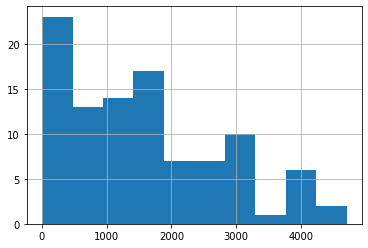

In [ ]:
np.random.seed(42)
pd.Series(np.abs(np.random.normal(1000,2000,size=100))).hist()

In [ ]:
np.random.seed(42)
parcel_aggr['mass'] = np.round(np.abs(np.random.normal(10000,20000,size=100))).astype(int)

In [ ]:
parcel_aggr

,parcel_id,accept_date,index_id,mass
0,0,2017-04-07,6,19934
1,1,2017-04-20,3,7235
2,2,2017-04-29,7,22954
3,3,2017-04-15,4,40461
4,4,2017-04-11,6,5317
...,...,...,...,...
95,95,2017-04-29,9,19270
96,96,2017-04-18,8,15922
97,97,2017-04-26,6,15221
98,98,2017-04-12,8,10102


In [ ]:
np.random.seed(42)
parcel_aggr['price'] = np.round(np.abs(np.random.normal(10000,40000,size=100))).astype(int)

In [ ]:
parcel_aggr['client_type'] = (pd.Series(['Физическое лицо','Юридическое лицо'])
.sample(100,replace=True,random_state=42).values)

In [ ]:
parcel_aggr

,parcel_id,accept_date,index_id,mass,price,client_type
0,0,2017-04-07,6,19934,29869,Физическое лицо
1,1,2017-04-20,3,7235,4469,Юридическое лицо
2,2,2017-04-29,7,22954,35908,Физическое лицо
3,3,2017-04-15,4,40461,70921,Физическое лицо
4,4,2017-04-11,6,5317,634,Физическое лицо
...,...,...,...,...,...,...
95,95,2017-04-29,9,19270,48541,Юридическое лицо
96,96,2017-04-18,8,15922,21845,Юридическое лицо
97,97,2017-04-26,6,15221,20442,Юридическое лицо
98,98,2017-04-12,8,10102,10205,Юридическое лицо


In [ ]:
index_data = pd.DataFrame({'index_id':range(10)})

In [ ]:
index_data['area'] = ['a','b','c','d','e','f','g','h','i','j']

In [ ]:
np.random.seed(42)
index_data['population'] = np.round(np.abs(np.random.normal(10000,40000,size=10))).astype(int)

In [ ]:
index_data['population'] = [10000,20002,60000,70000,100001,150000,200000,300000,600000,700000]

**Connection**

In [ ]:
con = sqlite3.connect('db')
cur = con.cursor()

In [ ]:
parcel_aggr.to_sql('parcel_aggr',con,if_exists='replace',index=False)

In [ ]:
def select(sql):
  return pd.read_sql(sql,con)

In [ ]:
sql = '''select * from parcel_aggr'''

In [ ]:
select(sql)

,parcel_id,accept_date,index_id,mass,price,client_type
0,0,2017-04-07 00:00:00,6,19934,29869,Физическое лицо
1,1,2017-04-20 00:00:00,3,7235,4469,Юридическое лицо
2,2,2017-04-29 00:00:00,7,22954,35908,Физическое лицо
3,3,2017-04-15 00:00:00,4,40461,70921,Физическое лицо
4,4,2017-04-11 00:00:00,6,5317,634,Физическое лицо
...,...,...,...,...,...,...
95,95,2017-04-29 00:00:00,9,19270,48541,Юридическое лицо
96,96,2017-04-18 00:00:00,8,15922,21845,Юридическое лицо
97,97,2017-04-26 00:00:00,6,15221,20442,Юридическое лицо
98,98,2017-04-12 00:00:00,8,10102,10205,Юридическое лицо


In [ ]:
index_data.to_sql('index_data',con,if_exists='replace',index=False)

In [ ]:
sql = '''select * from index_data t'''

In [ ]:
select(sql)

,index_id,area,population
0,0,a,10000
1,1,b,20002
2,2,c,60000
3,3,d,70000
4,4,e,100001
5,5,f,150000
6,6,g,200000
7,7,h,300000
8,8,i,600000
9,9,j,700000


#АНАЛИЗ

In [ ]:
sql = '''select * from parcel_aggr'''

In [ ]:
select(sql)

,parcel_id,accept_date,index_id,mass,price,client_type
0,0,2017-04-07 00:00:00,6,19934,29869,Физическое лицо
1,1,2017-04-20 00:00:00,3,7235,4469,Юридическое лицо
2,2,2017-04-29 00:00:00,7,22954,35908,Физическое лицо
3,3,2017-04-15 00:00:00,4,40461,70921,Физическое лицо
4,4,2017-04-11 00:00:00,6,5317,634,Физическое лицо
...,...,...,...,...,...,...
95,95,2017-04-29 00:00:00,9,19270,48541,Юридическое лицо
96,96,2017-04-18 00:00:00,8,15922,21845,Юридическое лицо
97,97,2017-04-26 00:00:00,6,15221,20442,Юридическое лицо
98,98,2017-04-12 00:00:00,8,10102,10205,Юридическое лицо


In [ ]:
sql = '''select * from index_data'''

In [ ]:
select(sql)

,index_id,area,population
0,0,a,10000
1,1,b,20002
2,2,c,60000
3,3,d,70000
4,4,e,100001
5,5,f,150000
6,6,g,200000
7,7,h,300000
8,8,i,600000
9,9,j,700000


Вывести средний размер тарифа на пересылку и массы по индексам отделений, в которых было принято отправление.

In [ ]:
sql = '''select t.index_id,count(t.index_id), avg(t.price) as avg_price, avg(t.mass) as avg_mass
from parcel_aggr t
group by t.index_id'''

In [ ]:
select(sql)

,index_id,count(t.index_id),avg_price,avg_mass
0,0,7,16729.428571,11164.000000
1,1,10,28877.000000,13596.000000
2,2,9,43902.222222,24729.000000
3,3,9,18383.111111,10928.111111
4,4,10,41301.800000,21651.000000
5,5,6,26750.166667,12980.166667
6,6,11,24733.090909,15031.636364
7,7,15,32669.733333,16841.000000
8,8,12,20238.833333,11452.166667
9,9,11,31775.818182,16969.090909


Вывести количество отправлений в разрезе индексов отделений, в которых было принято отправление. Учитывать только те отправления, у которых масса больше или равна 10 кг.

In [ ]:
sql = '''select t.index_id, 
count(t.index_id) as cnt
from parcel_aggr t
where t.mass >= 10000
group by t.index_id'''

In [ ]:
select(sql)

,index_id,cnt
0,0,4
1,1,7
2,2,9
3,3,3
4,4,6
5,5,3
6,6,7
7,7,9
8,8,7
9,9,8


Вывести количество отправлений в разрезе типа отправителя и группы по численности населения населенного пункта, в котором было принято отправление (меньше 50 тыс. (включительно), от 50 до 100 тыс. (включительно), от 100 до 500 тыс. (включительно), больше 500 тыс.).

In [ ]:
sql = '''select t.client_type, t.type_city, count(*) from (
select t.*, i.population,
case when i.population <= 50000 then 'меньше 50000'
when (i.population >= 50000 and i.population <= 100000)  then '50000-10000'
when i.population >=100000 and i.population <= 500000 then '100000-500000'
else 'больше 500000' end as type_city
from parcel_aggr t
left join index_data i on
t.index_id = i.index_id) t
group by 1,2
order by 1,2 desc
'''

In [ ]:
select(sql)

,client_type,type_city,count(*)
0,Физическое лицо,меньше 50000,9
1,Физическое лицо,больше 500000,4
2,Физическое лицо,50000-10000,9
3,Физическое лицо,100000-500000,22
4,Юридическое лицо,меньше 50000,8
5,Юридическое лицо,больше 500000,19
6,Юридическое лицо,50000-10000,9
7,Юридическое лицо,100000-500000,20


Вывести идентификатор отправления; регион, где было принято отправление; численность населения населенного пункта, в котором было принято отправление и стоимость пересылки отправления (в рублях) с максимальной массой в каждом филиале.

In [ ]:
sql = '''with cte as(
select t.*, 
dense_rank() over(partition by t.index_id order by t.mass desc) as rnk
 from (
select t.index_id, t.parcel_id,
i.area, i.population, t.price, t.mass
from parcel_aggr t
left join index_data i on 
t.index_id = i.index_id) t )
select parcel_id, area, population, price
from cte
where rnk = 1
'''

In [ ]:
select(sql)

,parcel_id,area,population,price
0,91,a,10000,48746
1,64,b,20002,42501
2,31,c,60000,84091
3,47,d,70000,52285
4,73,e,100001,72586
5,14,f,150000,58997
6,37,g,200000,68387
7,74,h,300000,94790
8,79,i,600000,69503
9,65,j,700000,64250


Вывести идентификаторы отправлений, у которых масса строго больше, чем в среднем по базе

In [ ]:
sql = '''select parcel_id 
from parcel_aggr
where mass > (select avg(mass) from parcel_aggr)
LIMIT 5'''

In [ ]:
select(sql)

,parcel_id
0,0
1,2
2,3
3,6
4,7


In [ ]:
sql = '''select avg(mass) from parcel_aggr'''

In [ ]:
select(sql)

,avg(mass)
0,15714.62


Перед отпуском руководитель попросил вас: «вывести распределение количества отправлений по стоимости пересылки*». Необходимо подготовить 1 слайд, который раскроет данную проблематику.

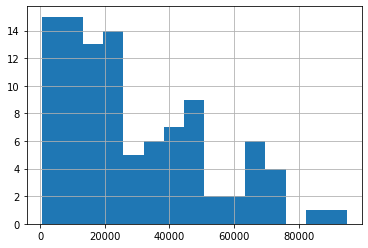

In [ ]:
parcel_aggr['price'].hist(bins=15)

In [ ]:
parcel_aggr['price_bin'] = pd.cut(parcel_aggr['price'], 10)

In [ ]:
parcel_aggr

,parcel_id,accept_date,index_id,mass,price,client_type,price_bin
0,0,2017-04-07,6,19934,29869,Физическое лицо,"(28868.9, 38286.2]"
1,1,2017-04-20,3,7235,4469,Юридическое лицо,"(522.827, 10034.3]"
2,2,2017-04-29,7,22954,35908,Физическое лицо,"(28868.9, 38286.2]"
3,3,2017-04-15,4,40461,70921,Физическое лицо,"(66538.1, 75955.4]"
4,4,2017-04-11,6,5317,634,Физическое лицо,"(522.827, 10034.3]"
...,...,...,...,...,...,...,...
95,95,2017-04-29,9,19270,48541,Юридическое лицо,"(47703.5, 57120.8]"
96,96,2017-04-18,8,15922,21845,Юридическое лицо,"(19451.6, 28868.9]"
97,97,2017-04-26,6,15221,20442,Юридическое лицо,"(19451.6, 28868.9]"
98,98,2017-04-12,8,10102,10205,Юридическое лицо,"(10034.3, 19451.6]"


In [ ]:
parcel_aggr.groupby('price_bin').agg({'parcel_id':'count'})

,parcel_id
price_bin,
"(522.827, 10034.3]",23
"(10034.3, 19451.6]",20
"(19451.6, 28868.9]",15
"(28868.9, 38286.2]",10
"(38286.2, 47703.5]",11
"(47703.5, 57120.8]",7
"(57120.8, 66538.1]",4
"(66538.1, 75955.4]",8
"(75955.4, 85372.7]",1
